# <a class="anchor" id="1.5_bullet" style="color:#581908"> **Model training and registration** </a>
---

In this notebook we will:

- Register a model to the model registry.
- Fetch the model from the model registry.

This will introduce the `hsml` (**H**opsworks **M**achine **L**earning) library, which contains functionality to keep track of models and deploy them.

*Note: you need to enable Serving to run this notebook. Go to the **old** Hopsworks UI, click on settings, and check the Serving box.*

In [1]:
import hsfs

conn = hsfs.connection()
fs = conn.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.


### <a class="anchor" id="1.5_bullet" style="color:#3772ff"> **⬇️ Training Dataset retrieval** </a>

To retrieve training dataset from **Feature Store** we retrieve **Feature View** using `FeatureStore.get_feature_view` method.

Then we can use **Feature View** in order to retrieve **training dataset** using `FeatureView.get_training_dataset` method.


In [2]:
feature_view = fs.get_feature_view(
    name = 'nyc_taxi_fares',
    version = 14
)

In [3]:
td_version, df = feature_view.get_training_dataset()

df.head()

2022-05-22 21:49:26,382 INFO: USE `nyc_taxi_fares_featurestore`
2022-05-22 21:49:27,389 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg1`.`total_fare` `total_fare`, `fg1`.`pickup_datetime` `pickup_datetime`, `fg1`.`month_of_the_ride` `month_of_the_ride`, `fg1`.`ride_id` `join_pk_ride_id`, `fg1`.`pickup_datetime` `join_evt_pickup_datetime`, `fg0`.`ride_id` `ride_id`, `fg0`.`pickup_longitude` `pickup_longitude`, `fg0`.`pickup_latitude` `pickup_latitude`, `fg0`.`dropoff_longitude` `dropoff_longitude`, `fg0`.`dropoff_latitude` `dropoff_latitude`, `fg0`.`passenger_count` `passenger_count`, `fg0`.`distance` `distance`, `fg0`.`pickup_distance_to_jfk` `pickup_distance_to_jfk`, `fg0`.`dropoff_distance_to_jfk` `dropoff_distance_to_jfk`, `fg0`.`pickup_distance_to_ewr` `pickup_distance_to_ewr`, `fg0`.`dropoff_distance_to_ewr` `dropoff_distance_to_ewr`, `fg0`.`pickup_distance_to_lgr` `pickup_distance_to_lgr`, `fg0`.`dropoff_distance_to_lgr` `dropoff_distance_to_lgr`, `fg0`.`year` `year`, `fg0`.`

,total_fare,pickup_datetime,month_of_the_ride,ride_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,year,weekday,hour
0,118.0,1577880020000,202001,1,-73.76764,40.886640,-73.843834,40.789670,3,7.794438,16.960192,10.813943,25.269297,18.642949,9.402573,1.808076,2020,2,12
1,48.0,1577880040000,202001,2,-73.85604,40.774130,-73.802030,40.842870,3,5.525897,10.044588,13.983367,17.669196,22.185668,0.959006,5.911146,2020,2,12
2,41.0,1577880060000,202001,3,-73.86453,40.763325,-73.847970,40.784400,3,1.694445,9.569711,10.542662,17.013063,18.309169,1.060797,1.457111,2020,2,12
3,44.0,1577880080000,202001,4,-73.86093,40.767902,-73.781784,40.868633,3,8.097295,9.764157,15.708376,17.288908,23.986612,0.924238,7.963623,2020,2,12
4,46.0,1577880100000,202001,5,-73.85884,40.770570,-73.754680,40.903137,3,10.655660,9.882264,18.132646,17.450841,26.459162,0.905815,10.722712,2020,2,12


## 🤖 **Model Building**

- Let's use GradientBoostingRegressor and RandomForestRegressor for demonstration purposes.

### <a class="anchor" id="1.5_bullet" style="color:#e363a3"> **📝 Importing Libraries** </a>

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### <a class="anchor" id="1.5_bullet" style="color:#30B305"> **🪓 Data Splitting** </a>

In [5]:
df.columns

Index(['total_fare', 'pickup_datetime', 'month_of_the_ride', 'ride_id',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'distance',
       'pickup_distance_to_jfk', 'dropoff_distance_to_jfk',
       'pickup_distance_to_ewr', 'dropoff_distance_to_ewr',
       'pickup_distance_to_lgr', 'dropoff_distance_to_lgr', 'year', 'weekday',
       'hour'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['pickup_datetime','month_of_the_ride', 'ride_id', 'total_fare',
             'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1),
    df['total_fare'],
    test_size = 0.2,
    random_state = 42
)

## <a class="anchor" id="1.5_bullet" style="color:#df2935"> **🧬 Modeling** </a>

### <a class="anchor" id="1.5_bullet" style="color:#df2935"> **🔬 Support Vector Regressor** </a>


In [13]:
gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
gbr_preds = gbr_model.predict(X_test)

gbr_r2_score = r2_score(y_test, gbr_preds)
gbr_mae = mean_absolute_error(y_test, gbr_preds)

print("Gradient Boosting Regressor R²:", gbr_r2_score)
print("Gradient Boosting Regressor MAE:", gbr_mae)

Gradient Boosting Regressor R²: 0.7600823289843527
Gradient Boosting Regressor MAE: 8.853217242411707


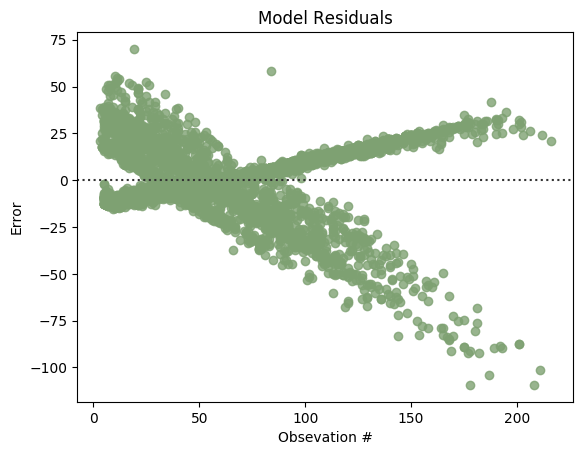

In [26]:
sns.residplot(y_test, gbr_preds, color='#7EA172')
plt.title('Model Residuals')
plt.xlabel('Obsevation #')
plt.ylabel('Error')

plt.show()

### <a class="anchor" id="1.5_bullet" style="color:#df2935"> **🔬 Random Forest Regressor** </a>


In [16]:
rf_model = RandomForestRegressor(
    n_jobs = -1,
    random_state = 42
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [35]:
rf_preds = rf_model.predict(X_test)

rf_r2_score = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

print("Random Forest Regressor R²:", rf_r2_score)
print("Random Forest Regressor MAE:", rf_mae)

Random Forest Regressor R²: 0.7798047981007217
Random Forest Regressor MAE: 7.906987289171352


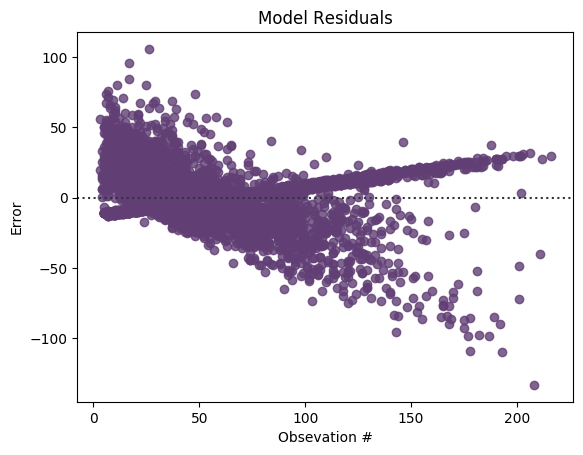

In [27]:
sns.residplot(y_test, rf_preds, color='#613F75')
plt.title('Model Residuals')
plt.xlabel('Obsevation #')
plt.ylabel('Error')

plt.show()

The Random Forest did a better job, so we will register this specififc model.

## <a class="anchor" id="1.5_bullet" style="color:#525252"> **📝 Register model** </a>


One of the features in Hopsworks is the model registry. This is where we can store different versions of models and compare their performance. Models from the registry can then be served as API endpoints.

Let's connect to the model registry using the [HSML library](https://docs.hopsworks.ai/machine-learning-api/latest) from Hopsworks.

In [28]:
import hsml

conn = hsml.connection()
mr = conn.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.


Before registering the model we will export it as a pickle file using joblib.

In [29]:
import joblib

joblib.dump(rf_model, 'model.pkl')

['model.pkl']

### <a class="anchor" id="1.5_bullet" style="color:#525252"> **Model Schema** </a>


The model needs to be set up with a [Model Schema](https://docs.hopsworks.ai/machine-learning-api/latest/generated/model_schema/), which describes the inputs and outputs for a model.

A Model Schema can be automatically generated from training examples, as shown below.

In [30]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

model_schema.to_dict()

{'input_schema': {'columnar_schema': [{'name': 'passenger_count',
    'type': 'int64'},
   {'name': 'distance', 'type': 'float64'},
   {'name': 'pickup_distance_to_jfk', 'type': 'float64'},
   {'name': 'dropoff_distance_to_jfk', 'type': 'float64'},
   {'name': 'pickup_distance_to_ewr', 'type': 'float64'},
   {'name': 'dropoff_distance_to_ewr', 'type': 'float64'},
   {'name': 'pickup_distance_to_lgr', 'type': 'float64'},
   {'name': 'dropoff_distance_to_lgr', 'type': 'float64'},
   {'name': 'year', 'type': 'int64'},
   {'name': 'weekday', 'type': 'int64'},
   {'name': 'hour', 'type': 'int64'}]},
 'output_schema': {'columnar_schema': [{'name': 'total_fare',
    'type': 'float64'}]}}

With the schema in place, we can finally register our model.

In [36]:
metrics = {
    'mae': rf_mae,
    'r2_score': rf_r2_score
}


In [37]:
model = mr.sklearn.create_model(
    name="rf_nyc_taxi_fares_model",
    metrics=metrics,
    description="Random Forest Regressor without tuning.",
    input_example=X_train.sample(),
    model_schema=model_schema
)

model.save('model.pkl')


Exported model rf_nyc_taxi_fares_model with version 1


Model('rf_nyc_taxi_fares_model', 1, 'SKLEARN')

Here we have also saved an input example from the training data, which can be helpful for test purposes.

It's important to know that every time you save a model with the same name, a new version of the model will be saved, so nothing will be overwritten. In this way, you can compare several versions of the same model - or create a model with a new name, if you prefer that.

### <a class="anchor" id="1.5_bullet" style="color:#525252"> **Finding the best performing model** </a>


Let's imagine you have trained and registered several versions of the same model. Now you can query the model registry for the best model according to your preferred criterion, say F1-score in our case.

The `direction` option is used to indicate if the metric should be high or low (max or min); in our case, it should be high (max).

In [38]:
best_model = mr.get_best_model(name="rf_nyc_taxi_fares_model", metric="r2_score", direction="max")
best_model.to_dict()

{'id': 'rf_nyc_taxi_fares_model_1',
 'experimentId': None,
 'projectName': 'NYC_taxi_fares',
 'experimentProjectName': 'NYC_taxi_fares',
 'name': 'rf_nyc_taxi_fares_model',
 'modelSchema': {'href': 'https://hopsworks.glassfish.service.consul:8182/hopsworks-api/api/project/122/dataset/Projects/NYC_taxi_fares/Models/rf_nyc_taxi_fares_model/1/model_schema.json',
  'zip_state': 'NONE'},
 'version': 1,
 'description': 'Random Forest Regressor without tuning.',
 'inputExample': {'href': 'https://hopsworks.glassfish.service.consul:8182/hopsworks-api/api/project/122/dataset/Projects/NYC_taxi_fares/Models/rf_nyc_taxi_fares_model/1/input_example.json',
  'zip_state': 'NONE'},
 'framework': 'SKLEARN',
 'metrics': {'mae': '7.906987289171352', 'r2_score': '0.7798047981007217'},
 'trainingDataset': None,
 'environment': ['/Projects/NYC_taxi_fares/Models/rf_nyc_taxi_fares_model/1/environment.yml'],
 'program': 'Models/rf_nyc_taxi_fares_model/1/program.ipynb'}

### Next Steps

In the next notebook, we'll look at model serving for the model we just registered to the Model Registry.